In [1]:
import pandas as pd
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
C:\Users\Christy\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [34]:
data = pd.read_csv('data/Advertising.csv')

In [35]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [36]:
data.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [4]:
data = data.drop('Unnamed: 0',axis = 1)
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
data.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [6]:
data.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [7]:
data.shape

(200, 4)

{'whiskers': [<matplotlib.lines.Line2D at 0x1efe1ec5ac8>,
 'caps': [<matplotlib.lines.Line2D at 0x1efe1ee3f48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1efe1ed0a88>],
 'medians': [<matplotlib.lines.Line2D at 0x1efe1ef0bc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1efe1ef6bc8>],
 'means': []}

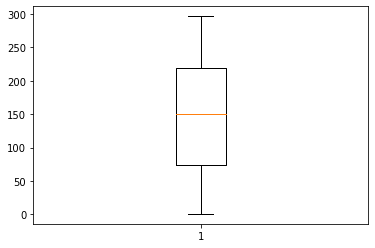

In [8]:
plt.boxplot(data['TV']) 

{'whiskers': [<matplotlib.lines.Line2D at 0x1efe1f8ca08>,
 'caps': [<matplotlib.lines.Line2D at 0x1efe1f919c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1efe1f85f48>],
 'medians': [<matplotlib.lines.Line2D at 0x1efe1f96948>],
 'fliers': [<matplotlib.lines.Line2D at 0x1efe1f96f88>],
 'means': []}

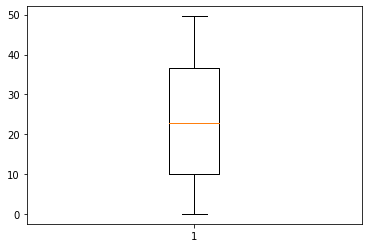

In [9]:
plt.boxplot(data['radio']) 

{'whiskers': [<matplotlib.lines.Line2D at 0x1efe1ffa8c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1efe1ffafc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1efe1ff5ec8>],
 'medians': [<matplotlib.lines.Line2D at 0x1efe1ffff88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1efe2003f88>],
 'means': []}

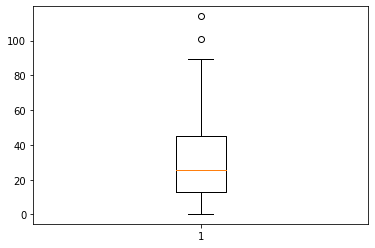

In [10]:
plt.boxplot(data['newspaper']) 

In [11]:
## Newspaper has few outlier values (only upper outliers)
#we need to handle it

#how will you do this?


In [12]:
desc = data['newspaper'].describe()
desc

count    200.000000
mean      30.554000
std       21.778621
min        0.300000
25%       12.750000
50%       25.750000
75%       45.100000
max      114.000000
Name: newspaper, dtype: float64

In [13]:
IQR = desc['75%'] - desc['25%']
upper_limit = desc['75%'] + 1.5*IQR

In [14]:
#replace the outlier values with upper limit values.

In [15]:
data['newspaper'][data['newspaper']>upper_limit] = upper_limit

{'whiskers': [<matplotlib.lines.Line2D at 0x1efe20ca348>,
 'caps': [<matplotlib.lines.Line2D at 0x1efe20cac08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1efe20c58c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1efe20cfb88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1efe20d4a08>],
 'means': []}

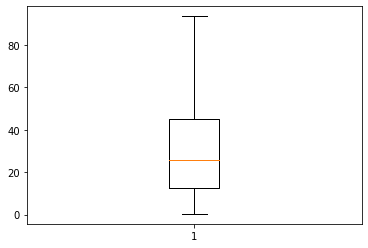

In [16]:
plt.boxplot(data['newspaper'])  #outlier values are removed

In [31]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.059325,0.782224
radio,0.054809,1.000000,0.355953,0.576223
newspaper,0.059325,0.355953,1.000000,0.231432
sales,0.782224,0.576223,0.231432,1.000000


In [17]:
#splitting into input and output vectors

In [18]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [20]:
y = data['sales']
X = data.drop('sales',axis = 1)

In [21]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [23]:
X.shape

(200, 3)

In [24]:
type(X)

pandas.core.frame.DataFrame

In [22]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [25]:
#import train_test_split to split the data for training and testing

from sklearn.model_selection import train_test_split #we are only importing  train_test_split function from sklearn within the class model_selection

#train_test_split is splitiing the data randomnly

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) #75% data will be for training and 25% data for testing

In [26]:
from sklearn.linear_model import LinearRegression  #importing LinearRegression from sklearn within the class linear_model

In [27]:
lin_reg = LinearRegression() #creating object of LinearRegression

In [28]:
lin_reg.fit(X_train,y_train) #training and fitting LR object using training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
m  = lin_reg.coef_
print(m)

[ 0.04690752  0.19274367 -0.00509664]


In [30]:
c = lin_reg.intercept_
c

2.7128306244718594

In [37]:
ypred=lin_reg.predict(X_test)  #ypred consist of the predicted salary corresponding to X_test

In [38]:
ypred

array([ 7.91848828,  6.59308019,  5.8543288 , 18.78866064, 18.0591028 ,
       19.08080885, 10.25866392, 22.92113404, 14.13657133, 15.10252573,
        9.70190871,  5.8029383 , 12.20223637, 12.77535921, 19.09306368,
        8.54267165, 21.25847526, 15.33801405, 12.31845168, 10.45794727,
        9.87968104, 14.31695801,  8.03468016,  6.29630193, 12.47803776,
        8.71446986,  9.67739272, 16.96454272,  7.20025502,  8.62303724,
       20.47029752, 15.62003582,  8.68125864,  6.42792458, 16.85820262,
       12.71770905, 24.91364878, 15.09287901,  6.37532976, 11.01620203,
       11.61223442, 19.32555624,  6.89285142, 15.31769343,  9.99202259,
       11.9898456 , 12.97769799, 19.26186592,  8.26035183,  8.64664741])

In [46]:
from sklearn.metrics import mean_squared_error #calculating MSE
MSE=mean_squared_error(ypred,y_test)
print("MSE for Testing:",MSE)

MSE for Testing: 2.584983285299466


In [48]:
#Training Error
y_pred_training = lin_reg.predict(X_train)
MSE_training=mean_squared_error(y_pred_training,y_train)
print("MSE for Training:",MSE_training)

MSE for Training: 2.882191363311


In [40]:
sum((y_test-ypred)**2)/len(ypred) #this is how we can calculate MSE.

2.584983285299466

In [43]:
lin_reg.score(X_train,y_train)

0.8961926121091814

In [44]:
lin_reg.score(X_test,y_test)  #R-square value

0.8900704113009424

#### R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression


R-squared = Explained variation / Total variation

R-squared is always between 0 and 100%:

0% indicates that the model explains none of the variability of the response data around its mean.

100% indicates that the model explains all the variability of the response data around its mean.

In [50]:
from sklearn.metrics import r2_score
r2_score(y_test,ypred)

0.8900704113009426

In [51]:
#END